Running Cantera version: 2.6.0
2681.8008553986547


(2880.0, 2910.0)

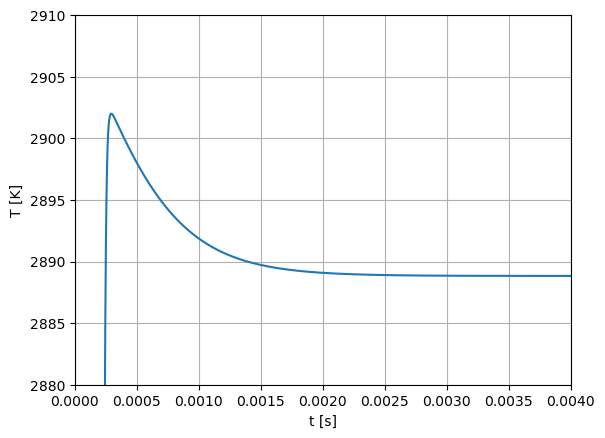

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import csv
import time
import glob
import os
import cantera as ct
print('Running Cantera version: ' + ct.__version__)

##############################These functions calculate the ignition and IDT#######################################

def setting_up_reactor_content (equiv_ratio, 
                                reactor_pressure,
                                reactor_temperature, 
                                Fuel, 
                                Oxidizer, 
                                Diluent, 
                                Diluent_fraction):

            gas.TP = reactor_temperature, reactor_pressure          
            gas.set_equivalence_ratio(equiv_ratio, Fuel, Oxidizer, diluent=Diluent, fraction={"diluent":Diluent_fraction})
            gas_adi.TP = reactor_temperature, reactor_pressure          
            gas_adi.set_equivalence_ratio(equiv_ratio, Fuel, Oxidizer, diluent=Diluent, fraction={"diluent":Diluent_fraction})
            gas_adi.equilibrate('HP', solver='gibbs', max_steps=1000)
            adiabaticT = gas_adi.T
            print(adiabaticT)
            # gas.TPX = reactor_temperature, reactor_pressure, Fuel
            # return reactor_temperature, reactor_pressure, equiv_ratio
            return adiabaticT

def basic_idt_calculation (gas_object, filename):
    # r = ct.ConstPressureReactor(contents=gas_object, name="Batch Reactor")
    r = ct.IdealGasReactor(contents=gas_object, name="Batch Reactor")
    reactor_network = ct.ReactorNet([r])

    # use the above list to create a DataFrame
    states = ct.SolutionArray(gas_object, extra="t")

    # This is a starting estimate. If you do not get an ignition within this time, increase it
    estimated_ignition_delay_time = 1
    t = 0

    while t < estimated_ignition_delay_time:
        t = reactor_network.step()
        states.append(r.thermo.state, t=t)
    states.write_csv(filename)
    flameStructure = pd.read_csv(filename)
    # files=glob.glob(filename)
    # for filename in files: os.unlink(filename)
    return flameStructure


#########################################Inputs#######################################################
mech = 'Konnov_Han2021_dup_repairedfN2.yaml'
mechname = 'Han2021'

gas = ct.Solution(mech)
gas_adi = ct.Solution(mech)
gas.name = mechname

# Simulation parameters
Pressure = 1*ct.one_atm   # pressure [Pa]
Temperature = 1000     # unburned gas temperature [K]   
phi = 1.0         # Equivalence ratio


adiabaticT = setting_up_reactor_content (equiv_ratio = phi, 
            reactor_pressure = Pressure,
            reactor_temperature = Temperature, 
            Fuel = "H2: 1.0",
            Oxidizer = "O2: 1.0, N2: 3.76, N2O: 0.0",  # Uncomment for Air
            #Oxidizer = "O2: 0.0, N2: 0.0, N2O: 1.0",  # Uncomment for N2O
            Diluent = "HE", 
            Diluent_fraction = 0.0)
                                
flameStructure = basic_idt_calculation (gas_object = gas, 
                filename = 'transient_profiles{}_{}_{}.csv'.format(gas.name,Pressure,Temperature))


saft = float(flameStructure['T'].max() - adiabaticT)
#print(saft)

time = flameStructure['t']
temp = flameStructure['T']


# Plot
plt.plot(time, temp)
plt.grid(True)
plt.xlabel("t [s]")
plt.ylabel("T [K]")

#Air
pylab.xlim(0.0, 0.004)
pylab.ylim(2880, 2910)

#N2O
#pylab.xlim(0.002, 0.012)
#pylab.ylim(3200, 3800)


Running Cantera version: 2.6.0
3086.239831611366


(3200.0, 3800.0)

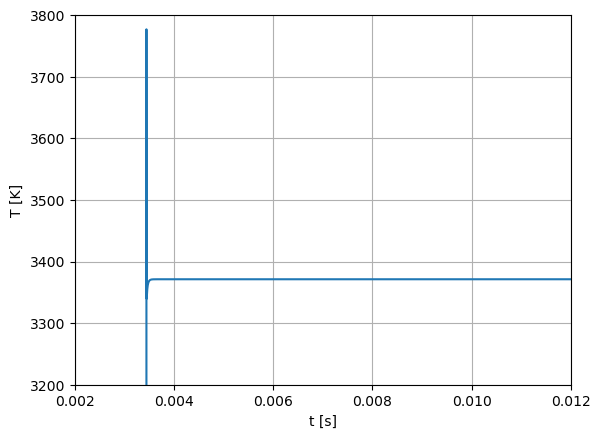

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import csv
import time
import glob
import os
import cantera as ct
print('Running Cantera version: ' + ct.__version__)

###############################These functions calculate the ignition and IDT#######################################

def setting_up_reactor_content (equiv_ratio, 
                                reactor_pressure,
                                reactor_temperature, 
                                Fuel, 
                                Oxidizer, 
                                Diluent, 
                                Diluent_fraction):

            gas.TP = reactor_temperature, reactor_pressure          
            gas.set_equivalence_ratio(equiv_ratio, Fuel, Oxidizer, diluent=Diluent, fraction={"diluent":Diluent_fraction})
            gas_adi.TP = reactor_temperature, reactor_pressure          
            gas_adi.set_equivalence_ratio(equiv_ratio, Fuel, Oxidizer, diluent=Diluent, fraction={"diluent":Diluent_fraction})
            gas_adi.equilibrate('HP', solver='gibbs', max_steps=1000)
            adiabaticT = gas_adi.T
            print(adiabaticT)
            # gas.TPX = reactor_temperature, reactor_pressure, Fuel
            # return reactor_temperature, reactor_pressure, equiv_ratio
            return adiabaticT

def basic_idt_calculation (gas_object, filename):
    # r = ct.ConstPressureReactor(contents=gas_object, name="Batch Reactor")
    r = ct.IdealGasReactor(contents=gas_object, name="Batch Reactor")
    reactor_network = ct.ReactorNet([r])

    # use the above list to create a DataFrame
    states = ct.SolutionArray(gas_object, extra="t")

    # This is a starting estimate. If you do not get an ignition within this time, increase it
    estimated_ignition_delay_time = 1
    t = 0

    while t < estimated_ignition_delay_time:
        t = reactor_network.step()
        states.append(r.thermo.state, t=t)
    states.write_csv(filename)
    flameStructure = pd.read_csv(filename)
    # files=glob.glob(filename)
    # for filename in files: os.unlink(filename)
    return flameStructure


#########################################Inputs#######################################################
mech = 'Konnov_Han2021_dup_repairedfN2.yaml'
mechname = 'Han2021'

gas = ct.Solution(mech)
gas_adi = ct.Solution(mech)
gas.name = mechname

# Simulation parameters
Pressure = 1*ct.one_atm   # pressure [Pa]
Temperature = 1000     # unburned gas temperature [K]   
phi = 1.0         # Equivalence ratio


adiabaticT = setting_up_reactor_content (equiv_ratio = phi, 
            reactor_pressure = Pressure,
            reactor_temperature = Temperature, 
            Fuel = "H2: 1.0",
            #Oxidizer = "O2: 1.0, N2: 3.76, N2O: 0.0",  # Uncomment for Air
            Oxidizer = "O2: 0.0, N2: 0.0, N2O: 1.0",  # Uncomment for N2O
            Diluent = "HE", 
            Diluent_fraction = 0.0)
                                
flameStructure = basic_idt_calculation (gas_object = gas, 
                filename = 'transient_profiles{}_{}_{}.csv'.format(gas.name,Pressure,Temperature))


saft = float(flameStructure['T'].max() - adiabaticT)
#print(saft)

time = flameStructure['t']
temp = flameStructure['T']


# Plot
plt.plot(time, temp)
plt.grid(True)
plt.xlabel("t [s]")
plt.ylabel("T [K]")

#Air
#pylab.xlim(0.0, 0.004)
#pylab.ylim(2880, 2910)

#N2O
pylab.xlim(0.002, 0.012)
pylab.ylim(3200, 3800)
